# Part 1 - Vectors

For example, if you have the heights, weights, and ages of a large number of people, you can treat your data as three-dimensional vectors [height, weight, age]. If you’re teaching a class with four exams, you can treat student grades as fourdimensional vectors [exam1, exam2, exam3, exam4].

The simplest from-scratch approach is to represent vectors as lists of numbers. A list of three numbers corresponds to a vector in three-dimensional space, and vice versa.

In [1]:
# We’ll accomplish this with a type alias that says a Vector is just a list of floats:

from typing import List

Vector = List[float]

height_weight_age = [70, # inches, 
                     170, # pounds,
                     40] # years

grades = [95, # exam1
          80, # exam2
          75, # exam3
          62] # exam4

Arithmetic on vectors:

- Adding two vectors is done by adding their corresponding elements. For example, [1, 2] + [2, 1] = [1 + 2, 2 + 1] = [3, 3].

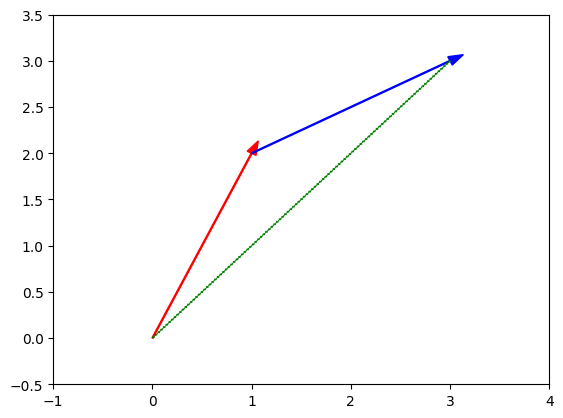

In [17]:
# Figure to show the addition of two vectors

from matplotlib import pyplot as plt

v = [1, 2]
w = [2, 1]

# The arrow will start at the origin (0, 0) and end at the point (1, 2), which is the vector [1, 2]
# Then, we’ll draw another arrow that starts at the end of the first one and ends at the point (2, 1), which is the vector [2, 1]
# We will also draw a dotted line that starts at the origin and ends at the point (3, 3), which is the vector [1+2, 2+1]
plt.figure()
plt.arrow(0, 0, v[0], v[1], width=0.01, color='r', head_width=0.1)
plt.arrow(v[0], v[1], w[0], w[1], width=0.01, color='b', head_width=0.1)
plt.arrow(0, 0, v[0]+w[0], v[1]+w[1], width=0.01, color='g', head_width=0, linestyle='dotted')
plt.xlim(-1, 4)
plt.ylim(-0.5, 3.5)
plt.show()

In [22]:
# We can implement vector addition as follows:

def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"
    
    return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]

In [23]:
# Similarly, we can implement vector subtraction:

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"
    
    return [v_i - w_i for v_i, w_i in zip(v, w)]

assert subtract([5, 7, 9], [4, 5, 6]) == [1, 2, 3]

In [24]:
# We can also componentwise sum a list of vectors:

def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"
    
    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"
    
    # The i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20]

In [25]:
# We can also multiply a vector by a scalar, which we do by multiplying each element of the vector by that number:

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]

In [28]:
# This allows us to compute the componentwise means of a list of (same-sized) vectors:

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4]

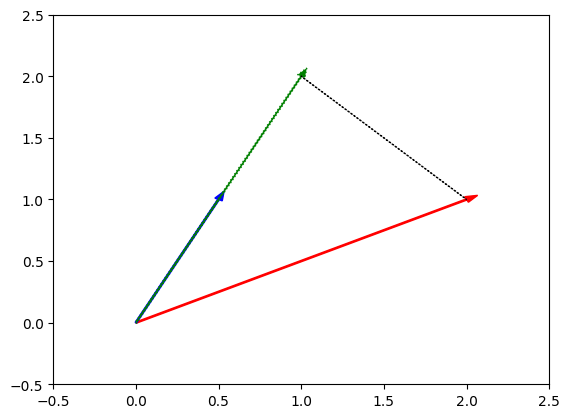

In [65]:
# The dot product of two vectors is the sum of their componentwise products:

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"
    
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32 # 1 * 4 + 2 * 5 + 3 * 6

# Draw the dot product of two vectors
# Also draw the projection of v onto w

v = [2, 1] # red
w = [0.5, 1] # blue

plt.figure()
plt.arrow(0, 0, v[0], v[1], width=0.01, color='r', head_width=0.05)
plt.arrow(0, 0, w[0], w[1], width=0.01, color='b', head_width=0.05)
plt.arrow(0, 0, 
          dot(v, w) * w[0], 
          dot(v, w) * w[1], 
          width=0.01, color='g', head_width=0.05, linestyle='dotted')

# Draw a line from the end of v to the end of the projection
plt.arrow(v[0], 
          v[1], 
          dot(v, w) * w[0] - v[0], 
          dot(v, w) * w[1] - v[1], 
          width=0.001, color='black', head_width=0, linestyle='dotted')

plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)
plt.show()

In [66]:
# Using the dot product, it’s easy to compute a vector’s sum of squares:

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14 # 1 * 1 + 2 * 2 + 3 * 3

In [67]:
# Which we can use to compute its magnitude (or length):

import math

def magnitude(v: Vector) -> float:
    return math.sqrt(sum_of_squares(v)) # math.sqrt is square root function

assert magnitude([3, 4]) == 5

In [ ]:
# We now have all the pieces we need to compute the distance between two vectors:

# In code:
def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))

# This is possibly clearer if we write it as (the equivalent):
def distance(v: Vector, w: Vector) -> float:
    return magnitude(subtract(v, w))

Using lists as vectors is great for exposition but terrible for performance. In production code, you would want to use the NumPy library, which includes a high-performance array class with all sorts of arithmetic operations included.

# Part 2 - Matrices

Matrix is a two-dimensional collection of numbers. We will represent matrices as lists of lists, with each inner list having the same size and representing a row of the matrix.

In [68]:
# Another type alisa for matrix
Matrix = List[List[float]]

A = [[1, 2, 3], # A has 2 rows and 3 columns
     [4, 5, 6]]

B = [[1, 2], # B has 3 rows and 2 columns
     [3, 4],
     [5, 6]]

In [69]:
from typing import Tuple

def shape(A: Matrix) -> Tuple[int, int]:
    """Returns (# of rows of A, # of columns of A)"""
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0 # number of elements in first row
    return num_rows, num_cols

assert shape([[1, 2, 3], [4, 5, 6]]) == (2, 3) # 2 rows, 3 columns

In [72]:
def get_row(A: Matrix, i: int) -> Vector:
    """Returns the i-th row of A (as a Vector)"""
    return A[i] # A[i] is already the ith row

def get_column(A: Matrix, j: int) -> Vector:
    """Returns the j-th column of A (as a Vector)"""
    return [A_i[j] # jth element of row A_i
            for A_i in A] # for each row A_i

assert get_row([[1, 2, 3], [4, 5, 6]], 0) == [1, 2, 3]
assert get_column([[1, 2, 3], [4, 5, 6]], 1) == [2, 5]

In [ ]:
# We’ll also want to be able to create a matrix given its shape and a function for generating its elements:

from typing import Callable

def make_matrix(num_rows: int, 
                num_cols: int, 
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """Returns a (num_rows x num_cols) matrix whose (i, j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) # given i, create a list
             for j in range(num_cols)] # [entry_fn(i, 0), ...]
             for i in range(num_rows)] # create one list for each i

# For example, we can create a 5 x 5 identity matrix:
def identity_matrix(n: int) -> Matrix:
    """Returns the n x n identity matrix"""
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

assert identity_matrix(5) == [[1, 0, 0, 0, 0],
                              [0, 1, 0, 0, 0],
                              [0, 0, 1, 0, 0],
                              [0, 0, 0, 1, 0],
                              [0, 0, 0, 0, 1]]

Matrix can also represent binary relationships. For example, if you have a network of people, you can use a matrix where the entry [i][j] is 1 if person i knows person j, and 0 otherwise.

In [74]:
# Recall that before we had:

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

# We can represent this as a matrix where the element (i, j) is 1 if person i is friends with person j; otherwise, it is 0:
# user 0  1  2  3  4  5  6  7  8  9
# 
friend_matrix = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
                 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
                 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
                 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
                 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
                 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
                 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

In [75]:
# If there are very few connections, this is a much more inefficient representation, since you end up having to store a lot of zeros. 
# However, with the matrix representation it is much quicker to check whether two nodes are connected.
# You just have to do a matrix lookup instead of (potentially) inspecting every edge:

assert friend_matrix[0][2] == 1, "0 and 2 are friends"
assert friend_matrix[0][8] == 0, "0 and 8 are not friends"

In [76]:
# Similarly, to find a node's connections, you just have to look up the corresponding row or column:

# only need to look at one row
friends_of_five = [i
                   for i, is_friend in enumerate(friend_matrix[5]) # user 5's friends 
                   if is_friend]

assert friends_of_five == [4, 6, 7], "user 5 has friends 4, 6, 7"

With a small graph you could just add a list of connections to each node object to speed up this process; but for a large, evolving graph that would probably be too expensive and difficult to maintain. This issue will be addressed later.